In [6]:
import torch
from torch.autograd import Variable
from pixel_crnn import utils
from pixel_crnn import dataset
from PIL import Image

from pixel_crnn.models import crnn as crnn
from pixel_crnn import params
import argparse
from IPython.core import display
import glob
import numpy as np
import cv2
import re

In [7]:
#Loading text recognition model
model_path = '/home/niddal/Desktop/PhD_projects/pixel_link-master/pixel_crnn/expr/l-4/netCRNN_5_39000-83.pth'

# net init
nclass = len(params.alphabet) + 1
model = crnn.CRNN(params.imgH, params.nc, nclass, params.nh)
# load model
print('loading pretrained model from %s' % model_path)

model.load_state_dict(torch.load(model_path))

converter = utils.strLabelConverter(params.alphabet)

transformer = dataset.resizeNormalize((100, 32))
seq = re.compile(",")


loading pretrained model from /home/niddal/Desktop/PhD_projects/pixel_link-master/pixel_crnn/expr/l-4/netCRNN_5_39000-83.pth


/usr/lib/python3/dist-packages/torch/nn/modules/rnn.py:54: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


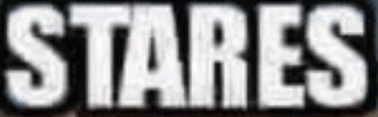

S------T---A---R---E-----S => STARES              


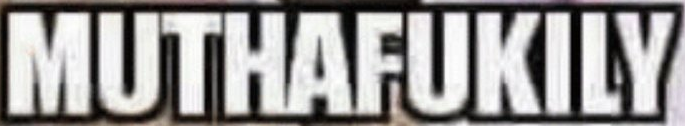

M----U-T--H-A-F-U-K-I-L--Y => MUTHAFUKILY         


In [29]:
with open('/home/niddal/Desktop/PhD_projects/pixel_link-master/model_path/New/test/icdar2015_test/model.ckpt-102684/txt/res_test_21.txt') as f:
        img = cv2.imread('/home/niddal/Desktop/PhD_projects/pixel_link-master/datasets/OSN/test/images/test_21.jpg')
        line_id = 0
        with open('/home/niddal/Desktop/PhD_projects/pixel_link-master/end2end_results/crnn_output.txt','w') as fp:
            #crop detected boxes
            for line in f:
                line_id += 1
                lst = seq.split(line.strip())
                x1 = int(lst[0])
                y1 = int(lst[1])
                x2 = int(lst[2])
                y2 = int(lst[3])
                x3 = int(lst[4])
                y3 = int(lst[5])
                x4 = int(lst[6])
                y4 = int(lst[7])
                cnt = np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
                rect = cv2.minAreaRect(cnt)
                  # print(rect)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                  # print(box)
                roi_img = img[min(box[:,1]):max(box[:,1]),min(box[:,0]):max(box[:,0])]
                # read and print(min(box[:,0]),max(box[:,0]),min(box[:,1]),max(box[:,1]))
                cv2.imwrite('/home/niddal/Desktop/PhD_projects/pixel_link-master/end2end_results/word_area_img/word_area_img'+str(line_id)+'.png',roi_img)
                img_path = '/home/niddal/Desktop/PhD_projects/pixel_link-master/end2end_results/word_area_img/word_area_img'+str(line_id)+'.png'
                image = Image.open(img_path).convert('L')
                image = transformer(image)
                 # if torch.cuda.is_available():
                  #  image = image.cuda()
                image = image.view(1, *image.size())
                image = Variable(image)
                model.eval()
                preds = model(image)
                _, preds = preds.max(2)
                preds = preds.transpose(1, 0).contiguous().view(-1)

                preds_size = Variable(torch.IntTensor([preds.size(0)]))
                raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
                sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
                display.display(display.Image(img_path))
                print('%-20s => %-20s' % (raw_pred, sim_pred))
                fp.write(sim_pred)
                fp.write('\n')

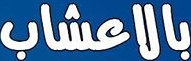

W-------------------ء---ت- => Wءت                 


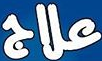

ع-ل---------------------ي- => علي                 


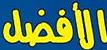

ا-ل-----ف---------------ل- => الفل                


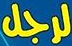

ل--ر------س-------------ل- => لرسل                


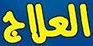

ا-للع------اااا---------ج- => العاج               


ا--------1اا-------------y => ا1اy                


غ------------------------- => غ                   


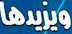

8---ز------ي-د---------فا- => 8زيدفا              


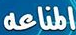

d--------e---l--i---b----l => delibl              


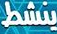

س-----------------------ص- => سص                  


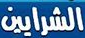

اللشش----ر-ااييي-------نن- => الشراين             


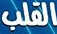

ا-للع------لل-----------ب- => العلب               


غ-ش----------------------s => غشs                 


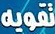

ن-ق---------------------ه- => نقه                 


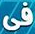

ق-----------------------ت- => قت                  


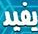

ر---ف------ي------------ة- => رفية                


Q------------------------- => Q                   


E------------------------R => ER                  


L--------I-----Z---------E => LIZE                


L--------------I---------z => LIz                 


L---------I-----z--------E => LIzE                


D----I--F---T---A---R----Y => DIFTARY             


s----u-p--p-l-e--m-e--n--t => supplement          


S-----O--F---T--G--E--L--S => SOFTGELS            


In [7]:
with open('/home/niddal/Desktop/PhD_projects/pixel_link-master/model_path/New/test/icdar2015_test/model.ckpt-102684/txt/res_test_8.txt') as f:
        img = cv2.imread('/home/niddal/Desktop/PhD_projects/pixel_link-master/datasets/OSN/test/images/test_8.jpg')
        line_id = 0
        with open('/home/niddal/Desktop/PhD_projects/pixel_link-master/model_path/New/test/icdar2015_test/model.ckpt-102684/txt/crnn_output.txt','w') as fp:
            #crop detected boxes
            for line in f:
                line_id += 1
                lst = seq.split(line.strip())
                x1 = int(lst[0])
                y1 = int(lst[1])
                x2 = int(lst[2])
                y2 = int(lst[3])
                x3 = int(lst[4])
                y3 = int(lst[5])
                x4 = int(lst[6])
                y4 = int(lst[7])
                cnt = np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
                rect = cv2.minAreaRect(cnt)
                  # print(rect)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                  # print(box)
                roi_img = img[min(box[:,1]):max(box[:,1]),min(box[:,0]):max(box[:,0])]
                # read and print(min(box[:,0]),max(box[:,0]),min(box[:,1]),max(box[:,1]))
                cv2.imwrite('/home/niddal/Desktop/PhD_projects/pixel_link-master/model_path/New/test/icdar2015_test/model.ckpt-102684/word_area_img/word_area_img'+str(line_id)+'.png',roi_img)
                img_path = '/home/niddal/Desktop/PhD_projects/pixel_link-master/model_path/New/test/icdar2015_test/model.ckpt-102684/word_area_img/word_area_img'+str(line_id)+'.png'
                image = Image.open(img_path).convert('L')
                image = transformer(image)
                 # if torch.cuda.is_available():
                  #  image = image.cuda()
                image = image.view(1, *image.size())
                image = Variable(image)
                model.eval()
                preds = model(image)
                _, preds = preds.max(2)
                preds = preds.transpose(1, 0).contiguous().view(-1)

                preds_size = Variable(torch.IntTensor([preds.size(0)]))
                raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
                sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
                display.display(display.Image(img_path))
                print('%-20s => %-20s' % (raw_pred, sim_pred))
                fp.write(sim_pred)
                fp.write('\n')

In [44]:
#check if there is a spam word extracted from the images
print('checking for spam words')
with open('/home/niddal/Desktop/PhD_projects/pixel_link-master/model_path/New/test/icdar2015_test/model.ckpt-102684/txt/crnn_output.txt') as extracted_words_file:
    with open('/home/niddal/Desktop/PhD_projects/pixel_link-master/pixel_crnn/blacklist.txt') as list_of_spam_words:
        all_strings = set(map(str.strip, list_of_spam_words))
        words = set(map(str.strip, extracted_words_file))
        for word in all_strings.intersection(words):
            print('A spam word was found:' + ' ' + word)
        else:
            print('No spam word was found')

checking for spam words
No spam word was found
